In [4]:
import tensorflow.keras as keras
import pandas as pd
import numpy as np
import pythainlp as pythai

## ชุดข้อมูล
https://github.com/PyThaiNLP/thai-sentiment-analysis-dataset

In [5]:
df1 = pd.read_csv(r'C:\Users\HP Notebook\Desktop\dataset\thai-sentiment-analysis-dataset-master\review_shopping.csv', sep='\t', encoding='utf-8', header=None)
df2 = pd.read_csv(r'C:\Users\HP Notebook\Desktop\dataset\thai-sentiment-analysis-dataset-master\general-amy.csv', sep='\t', encoding='utf-8', header=None)
df3 = pd.read_csv(r'C:\Users\HP Notebook\Desktop\dataset\thai-sentiment-analysis-dataset-master\tcas61.csv', sep='\t', encoding='utf-8', header=None)

# รวมทุก DataFrame โดยใช้ pd.concat()
data = pd.concat([df1, df2, df3], ignore_index=True)

data.columns = ['review', 'label']
data.head()

,review,label
0,เกลียด ชอบหลอกให้สั่งซื้อ ที่ไหนได้ไม่มีสิ้นค้า,neg
1,สินค้าด้อยคุณภาพ,neg
2,สินค้าหมดทำไมไม่แจ้งขึ้นว่าหมดอะ.กดใส่ตะกร้าไป...,neg
3,อย่าทำแบบนี้กับใครอีกนะค่ะแย่มากค่ะ,neg
4,คือเเบบผิดหวังมาก เเย่ที่สุดได้ของมาฝาเเตก เเต...,neg


### Tokenize

In [6]:
# Read data
#data = pd.read_csv('./datasets/review_shopping.csv', sep='\t', encoding='utf-8', header=None)
#data = data.append(pd.read_csv('./datasets/general-amy.csv', sep='\t', encoding='utf-8', header=None))
#data = data.append(pd.read_csv('./datasets/tcas61.csv', sep='\t', encoding='utf-8', header=None))
data.columns = ['review', 'label']
# drop null
data = data.dropna()
# tokenize
data['review'] = data['review'].apply(lambda x: pythai.word_tokenize(x, engine='newmm'))
data['label'] = data['label'].map({'pos': 1, 'neg': 0})
data.head()

,review,label
0,"[เกลียด, , ชอบ, หลอก, ให้, สั่งซื้อ, , ที่ไห...",0
1,"[สินค้า, ด้อย, คุณภาพ]",0
2,"[สินค้า, หมด, ทำไม, ไม่, แจ้ง, ขึ้น, ว่า, หมด,...",0
3,"[อย่า, ทำ, แบบนี้, กับ, ใคร, อีก, นะ, ค่ะ, แย่...",0
4,"[คือ, เเบบ, ผิดหวัง, มาก, , เเย่, ที่สุด, ได้...",0


In [7]:
# Tokenize
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=10000, oov_token='<UNK>')
tokenizer.fit_on_texts(data['review'])
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(data['review'])
padded = pad_sequences(sequences, maxlen=60, padding='post', truncating='post')
print('Sample:', padded[20])

Sample: [ 32 161  94 155  62  13   5  13   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0]


In [8]:
# sample
test = padded[20]
# to text
tokenizer.sequences_to_texts([test])

['ใช้ เดือน เดียว พัง แย่ ๆ มาก ๆ <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK>']

In [9]:
print(data.shape[0])
# train data
train_data = padded[:242]
train_label = data['label'][:242]
# test data
test_data = padded[242:]
test_label = data['label'][242:]
full = False
if full:
    train_data = padded
    train_label = data['label']
# train data, test data
print('Train data:', train_data.shape)
print('Test data:', test_data.shape)

341
Train data: (242, 60)
Test data: (99, 60)


In [10]:
# create simple model
model = keras.Sequential([
    keras.layers.Embedding(10000, 16, input_length=60),
    keras.layers.GlobalAveragePooling1D(),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

c:\Users\HP Notebook\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ ?                      │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [12]:
# train model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# early stop
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=30)
# train
model.fit(train_data, train_label, epochs=100, validation_data=(test_data, test_label), callbacks=[early_stop])

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.5114 - loss: 0.6930 - val_accuracy: 0.6667 - val_loss: 0.6883
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4920 - loss: 0.6934 - val_accuracy: 0.6667 - val_loss: 0.6861
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5200 - loss: 0.6915 - val_accuracy: 0.6667 - val_loss: 0.6840
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5297 - loss: 0.6894 - val_accuracy: 0.6667 - val_loss: 0.6804
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5251 - loss: 0.6887 - val_accuracy: 0.6667 - val_loss: 0.6793
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4756 - loss: 0.6925 - val_accuracy: 0.6667 - val_loss: 0.6813
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5100 - loss: 0.6868 - val_accuracy: 0.6667 - val_loss: 0.6780
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5732 - loss: 0.6807 - val_accuracy: 0.6667 - val_loss: 0.67

### Evaluate

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


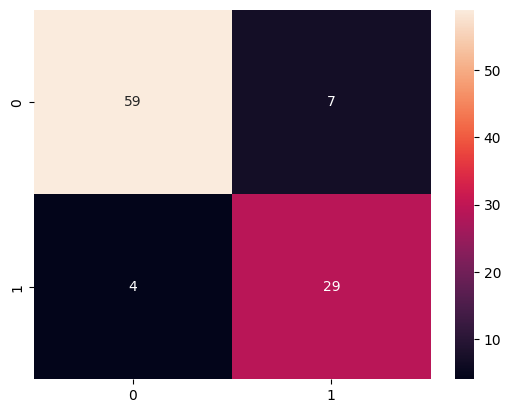

              precision    recall  f1-score   support

           0       0.94      0.89      0.91        66
           1       0.81      0.88      0.84        33

    accuracy                           0.89        99
   macro avg       0.87      0.89      0.88        99
weighted avg       0.89      0.89      0.89        99



In [13]:
# evaluate report
from sklearn.metrics import classification_report
# confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
y_pred = model.predict(test_data)
y_pred = np.round(y_pred)
cm = confusion_matrix(test_label, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()
print(classification_report(test_label, y_pred))

# save model

In [18]:
# save model
model.save(r'C:\Users\HP Notebook\Desktop\senti\how2deploy-master\finished\model\weight\model.h5')

In [19]:
# load weight
model = keras.models.load_model(r'C:\Users\HP Notebook\Desktop\senti\how2deploy-master\finished\model\weight\model.h5')
# save tokenizer
import pickle
with open(r'C:\Users\HP Notebook\Desktop\senti\how2deploy-master\finished\model\weight\tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
# evaluate
model.evaluate(test_data, test_label)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8673 - loss: 0.3091  


[0.30722007155418396, 0.868686854839325]

In [20]:
def predict(text, decode=False):
    text = pythai.word_tokenize(text, engine='newmm')
    text = tokenizer.texts_to_sequences([text])
    text = pad_sequences(text, maxlen=60, padding='post', truncating='post')
    predict = model.predict(text)
    rounded = np.round(predict)
    if decode:
        return 'pos' if rounded == 1 else 'neg'
    return rounded

In [21]:
# predict
pred = predict('อร่อยมาก', decode=True)
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


'pos'